In [1]:
import sys
import os

# Get the absolute path of the current notebook
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Calculate the root directory of your project
project_root = os.path.dirname(notebook_dir)

# Append the project root to sys.path
sys.path.append(project_root)

In [2]:
from src.flood_wave_data import FloodWaveData
from src.flood_wave_detector import FloodWaveDetector
from src.flood_wave_handler import FloodWaveHandler
from src.analysis import Analysis
from src.graph_builder import GraphBuilder
from src.plotter import Plotter

In [3]:
fwd_data = FloodWaveData()
gauges = fwd_data.gauges

C:\Users\Viktor\PycharmProjects\flood_wave_detector\src\dataloader.py:42: DtypeWarning: Columns (2,3,5,7,8,9,14,15,16,17,19,21,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(PROJECT_PATH, 'data', self.dataset_name + '.csv'), index_col=0, sep=";")


In [8]:
analysis = Analysis(gauges)
start_date = '1910-01-01'
end_date = '1912-12-31'
alpha = 0
beta = 3
delta = 2

folder = 'data_' + str(alpha) + '_' + str(beta) + '_' + str(delta)

backward_dict = dict()
forward_dict = dict()
for gauge in gauges:
    backward_dict[gauge] = alpha
    forward_dict[gauge] = beta


floodwave = FloodWaveDetector(folder_pf=folder, backward_dict=backward_dict, forward_dict=forward_dict,
                            centered_window_radius=delta, start_date=start_date, end_date=end_date, gauges=gauges)
floodwave.run()
builder = GraphBuilder()
builder.build_graph(folder_name=floodwave.folder_name)
handler = FloodWaveHandler()
plotter = Plotter(gauges=gauges)

C:\Users\Viktor\PycharmProjects\flood_wave_detector\src\dataloader.py:42: DtypeWarning: Columns (2,3,5,7,8,9,14,15,16,17,19,21,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(PROJECT_PATH, 'data', self.dataset_name + '.csv'), index_col=0, sep=";")
C:\Users\Viktor\PycharmProjects\flood_wave_detector\src\dataloader.py:42: DtypeWarning: Columns (2,3,5,7,8,9,14,15,16,17,19,21,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(PROJECT_PATH, 'data', self.dataset_name + '.csv'), index_col=0, sep=";")


func:mkdirs took: 0.0019981861114501953 sec
func:get_local_peak_values took: 0.0049915313720703125 sec
<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 1910-01-10 to 1912-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       152 non-null    float64
 1   Date    152 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 1910-01-10 to 1912-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       152 non-null    float64
 1   Date    152 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.6+ KB
func:find_local_maxima took: 0.01700282096862793 sec
Writing to file: C:\Users\Viktor\PycharmProjects\flood_wave_detector\generated_data_0_3_2\find_vertices\1.json
Writing to file: C:\Users\Viktor\PycharmProjects\flood_wave_detector\generated_data_0_3_2\find_vertices

func:get_local_peak_values took: 0.0009903907775878906 sec
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1910-01-14 to 1912-12-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   20      104 non-null    object
 1   Date    104 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1910-01-14 to 1912-12-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   20      104 non-null    object
 1   Date    104 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB
func:find_local_maxima took: 0.018006086349487305 sec
Writing to file: C:\Users\Viktor\PycharmProjects\flood_wave_detector\generated_data_0_3_2\find_vertices\20.json
func:get_local_peak_values took: 0.0009889602661132812 sec
<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 1910-01-30 to 1912-12-24
Data columns (total 2 columns):
 #  

C:\Users\Viktor\PycharmProjects\flood_wave_detector\src\dataloader.py:42: DtypeWarning: Columns (2,3,5,7,8,9,14,15,16,17,19,21,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(PROJECT_PATH, 'data', self.dataset_name + '.csv'), index_col=0, sep=";")


In [9]:
start_date = '1910-07-12'
end_date = '1910-12-31'

G = handler.create_directed_graph(start_date=start_date, end_date=end_date, gauge_pairs=builder.gauge_pairs, folder_name=floodwave.folder_name) 
plotter.plot_graph(directed_graph=G, start_date=start_date, end_date=end_date, save=True, folder_name=floodwave.folder_name, file_name="graph", add_isolated_nodes=False)

ValueError: min() arg is an empty sequence

In [11]:
G.nodes()

NodeView(())

In [8]:
positions = plotter.positions
node_colors = plotter.node_colors

In [8]:
#Filter by gauge
gauge="2275"
plotter.filter_by_gauge(gauge=gauge, start_date=start_date, end_date=end_date, save=True, folder_name=floodwave.folder_name, file_name="filtered_by_gauge", add_isolated_nodes=False)

TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 4000x2000 with 1 Axes>

In [10]:
plotter.filter_multiple_gauges(start_date=start_date, end_date=end_date, start_gauge="1518", end_gauge="2541", save=True, folder_name=floodwave.folder_name, file_name="filtered_by_gauge_interval", add_isolated_nodes=False)

TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 4000x2000 with 1 Axes>

In [10]:
#Filter by water level
gauge="2041"
plotter.filter_by_water_level(gauge=gauge, positions=positions, node_colors=node_colors, start_date=start_date, end_date=end_date, save=True, folder_name=floodwave.folder_name, file_name="filtered_by_water_level", add_isolated_nodes=False)

TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 4000x2000 with 1 Axes>

In [ ]:
start_date = '2010-01-01'
end_date = '2010-04-30'

G = handler.create_directed_graph(start_date=start_date,
                                               end_date=end_date,
                                               gauge_pairs=builder.gauge_pairs,
                                               folder_name=floodwave.folder_name)
plotter.plot_graph(directed_graph=G, start_date=start_date, end_date=end_date, save=True, folder_name=floodwave.folder_name, add_isolated_nodes=False)

In [8]:
plotter.gauges

[1514,
 1515,
 1516,
 1518,
 1520,
 1521,
 1719,
 1720,
 1721,
 2541,
 1722,
 1723,
 2543,
 2040,
 2041,
 2042,
 2046,
 2048,
 2271,
 2272,
 2274,
 2275,
 210888,
 210896,
 210900]

In [ ]:
start_date = '2010-01-01'
end_date = '2010-04-30'

G = handler.create_directed_graph(start_date=start_date,
                                               end_date=end_date,
                                               gauge_pairs=builder.gauge_pairs,
                                               folder_name=floodwave.folder_name)
plotter.plot_graph(directed_graph=G, start_date=start_date, end_date=end_date, save=True, folder_name=floodwave.folder_name, add_isolated_nodes=False)

In [ ]:
fwd_data.meta

In [ ]:
fwd_data.meta

In [ ]:
analysis.count_waves(G, 2042, 2275)

In [ ]:
analysis.count_waves(G, 2042, 2275)

In [ ]:
analysis.propagation_time(G, 2042, 2275)

In [ ]:
analysis.propagation_time(G, 2042, 2275)

1.6666666666666667

In [ ]:
H = analysis.create_flood_map(G, [1514, 1721, 2042, 2275])

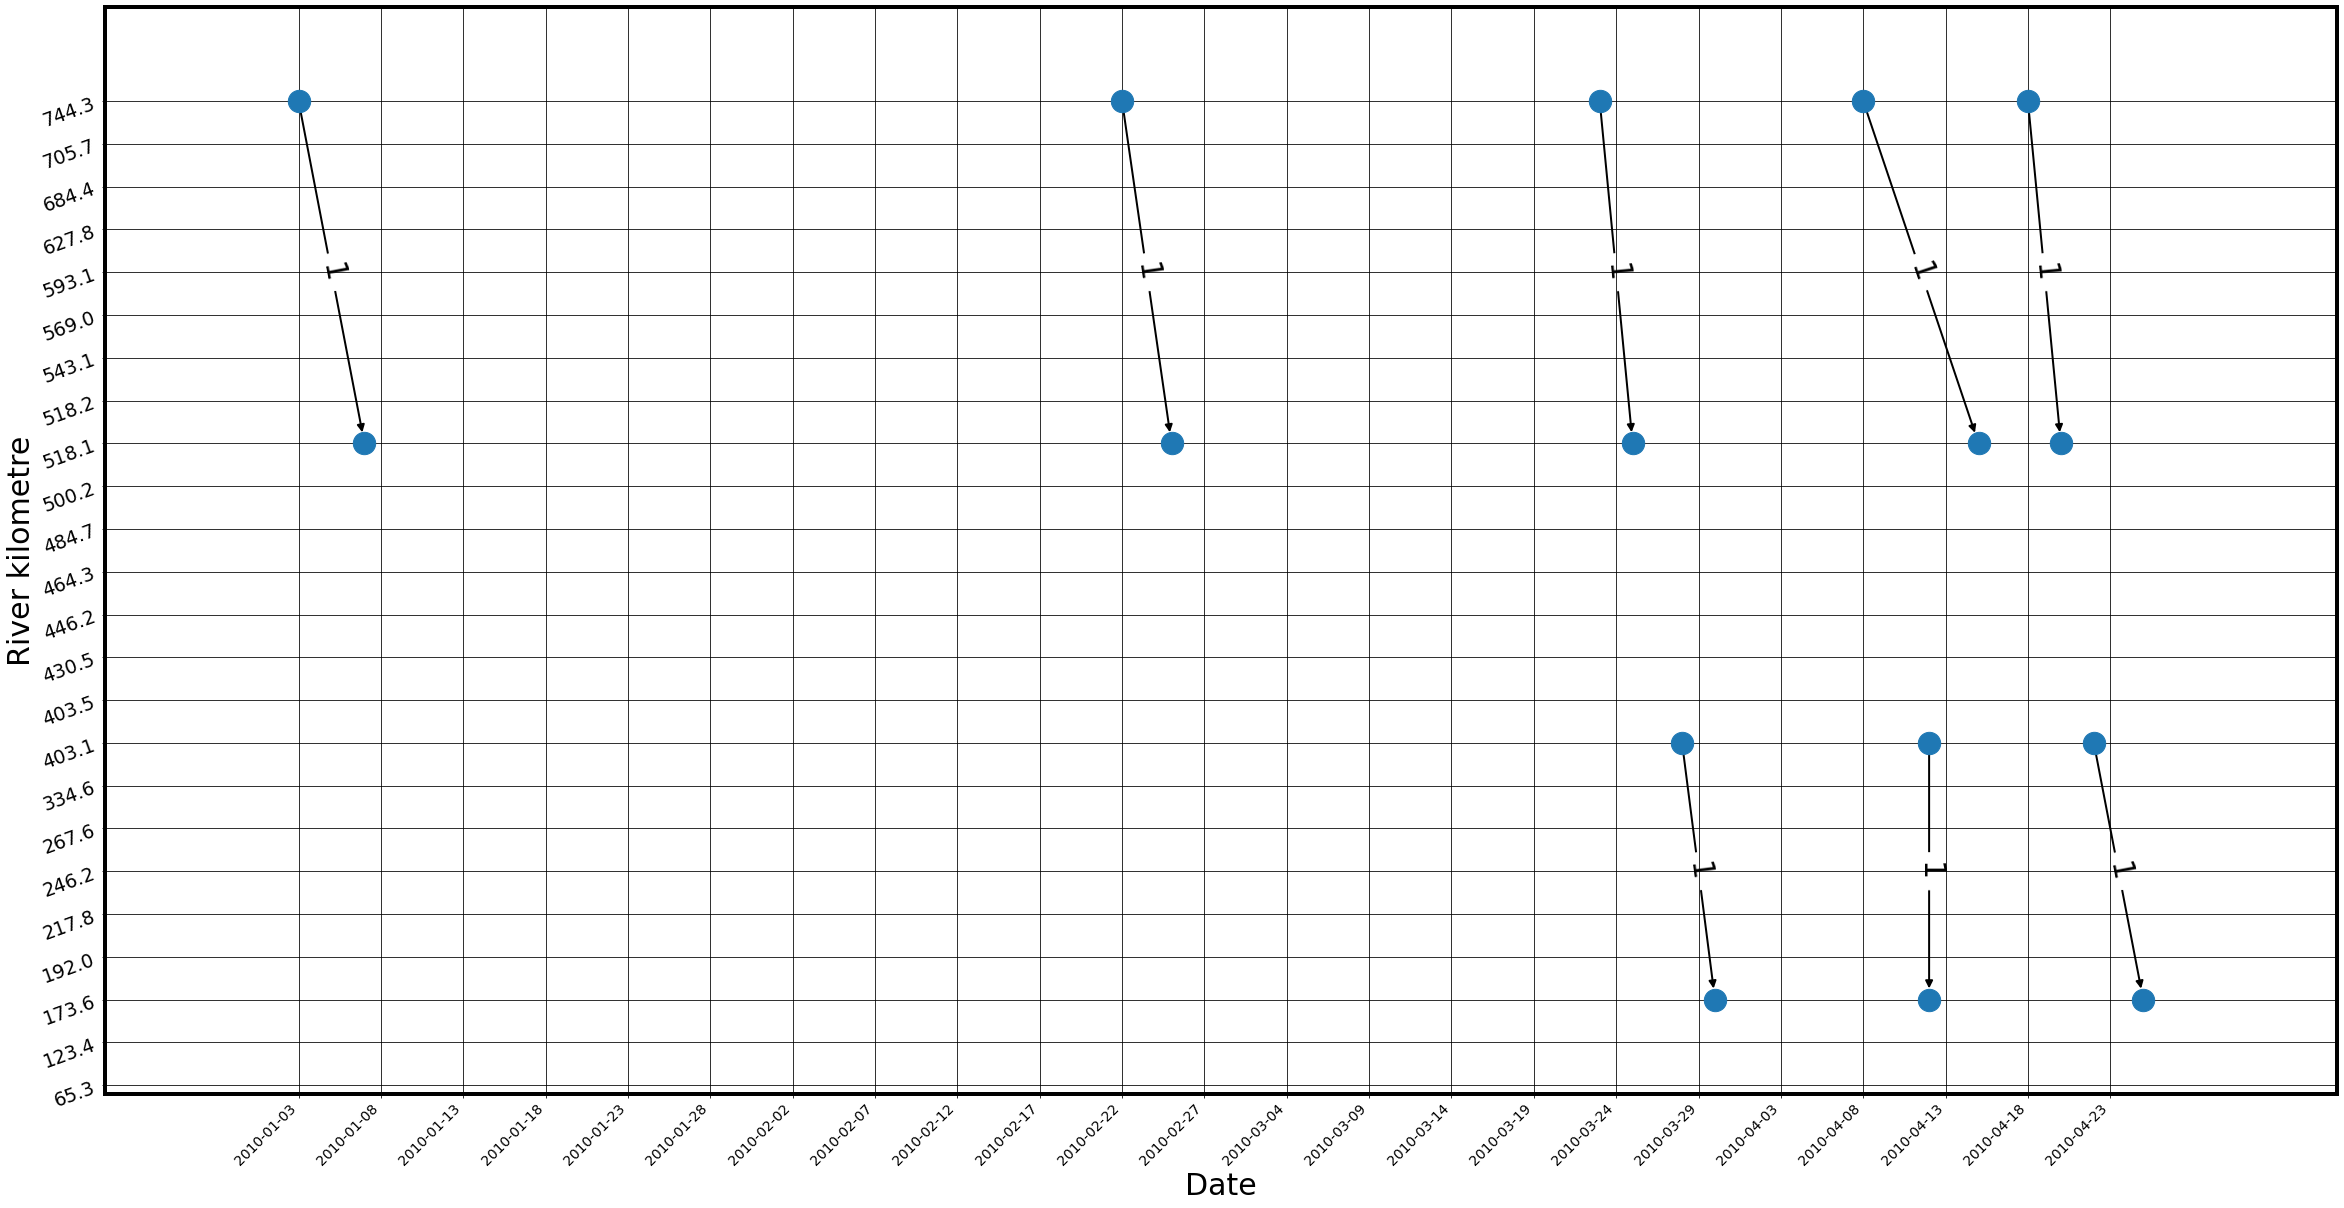

In [ ]:
start_date = '2010-01-01'
end_date = '2010-04-30'
plotter.plot_graph(directed_graph=H, start_date=start_date, end_date=end_date, save=True, folder_name=floodwave.folder_name, add_isolated_nodes=False)